In [1]:
!ls ../autopager/data/

data_all.csv  html_all	multi_lingual_test  test_data  test_yuching


In [2]:
import pandas as pd
from os import listdir
import sys
from sklearn import preprocessing
import numpy as np
from urllib.parse import quote, unquote
from parsel import Selector
sys.path.insert(0, '..')

In [1]:
from html.parser import HTMLParser

In [4]:
!ls ../autopager/data/multi_lingual_test

de  en	ja  ko	mlingual_data.xlsx  ru	zh


In [87]:
csv_dir = "../autopager/data/"
html_dir = "../autopager/data/html_all/"
data = pd.read_csv(csv_dir+'data_all.csv')

In [17]:
csv_dir = "../autopager/data/test_yuching/"
html_dir = "../autopager/data/test_yuching/html/"
data = pd.read_csv(csv_dir+'test_data.csv')

In [11]:
csv_dir = "../autopager/data/test_data/"
html_dir = "../autopager/data/test_data/html/"
data = pd.read_csv(csv_dir+'test_data.csv')

In [4]:
__multi_pd = pd.read_excel(csv_dir, None, engine='openpyxl')
language_keys = list(__multi_pd.keys())

In [5]:
language_keys

['en', 'zh', 'ko', 'ja', 'de', 'ru']

In [44]:
target_language = 'ru'
html_dir = f"../autopager/data/multi_lingual_test/{target_language}/"
csv_dir = f"../autopager/data/multi_lingual_test/mlingual_data.xlsx"
target_language_pd = pd.read_excel(csv_dir, sheet_name=target_language, engine='openpyxl')
data = target_language_pd[target_language_pd['Checked'] == 'T']

In [18]:
data = data.fillna('N/A')

In [19]:
data = data[data['Checked']=='T']

In [20]:
data['File Name'] = data['File Name'].astype(int)

In [21]:
data['File Name'] = data['File Name'].astype(str)

In [22]:
data.head()

,Checked,File Name,Page URL,Page Type,Encoding,PREV,PAGE,NEXT,LAST,FIRST,failed,# of non-label
0,T,1,https://ysmb.wda.gov.tw/,n,UTF-8,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,T,2,https://ysmb.wda.gov.tw/about.php,n,UTF-8,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,T,3,https://ysmb.wda.gov.tw/news.php,a,UTF-8,N/A,.pagination li:nth-child(n):nth-last-child(n+3) a,.pagination li:nth-last-child(2) a,.pagination li:nth-last-child(1) a,N/A,N/A,N/A
3,T,4,https://ysmb.wda.gov.tw/news.php?page=4&id=1,a,UTF-8,.pagination li:nth-child(2) a,.pagination li:nth-child(n+3):nth-last-child(n...,.pagination li:nth-last-child(2) a,.pagination li:nth-last-child(1) a,.pagination li:nth-child(1) a,N/A,N/A
4,T,5,https://ysmb.wda.gov.tw/activity_all.php,a,UTF-8,N/A,.pagination li:nth-child(n):nth-last-child(n+3) a,.pagination li:nth-last-child(2) a,.pagination li:nth-last-child(1) a,N/A,N/A,N/A


### Test tag parser

In [4]:
def parseAttribute(html):
    close_index = html.find('>')
    open_text = html[:close_index]
    open_text = open_text.replace('<a','')
    open_text = open_text.replace('<button','')
    print(open_text)

In [5]:
parseAttribute("<a class='pagination' href='https://yahoo.com.tw' >")

 class='pagination' href='https://yahoo.com.tw' 


## Block for testing selector via specific file

In [23]:
tagParser = TagParser()
parser = MyHTMLParser()

In [10]:
f = open(html_dir+"3"+".html", "r", encoding="UTF-8")
file = f.read()

In [11]:
parser._reset()
parser.feed(file)

## Test selector get position

In [51]:
f = open(html_dir+"80"+".html", "r", encoding="utf-8")
file = f.read()

In [52]:
file

'<!DOCTYPE html><!--[if lte IE 8]><html class="is-ie8" lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml"><![endif]--><!--[if IE 9]><html class="is-ie9" lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml"><![endif]--><!--[if gt IE 9]><!--><html lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml"><!--<![endif]--><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js"></script><script type="text/javascript" async="" src="//www.googleadservices.com/pagead/conversion_async.js"></script><script type="text/javascript" async="" src="//www.googleadservices.com/pagead/conversion_async.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script type="text/javascript" async="" src="//sync.im-apps.net/imid/segment?token=dmJmXE6ihffGM09UZqwoBg&amp;callback=TDWrapper_9568.tdw_ejyhn9.dmpCb.list.im.onReceive"

In [42]:
selector = Selector(text=file)
extracted_data = selector.css(".text a:nth-child(2)")

In [43]:
extracted_data.extract()

[]

In [74]:
parser._reset()
parser.feed(file)

In [77]:
for extract_data in extracted_data:
    tagParser.feed(extract_data.extract())
    tag_info = tagParser.pop_first_and_reset()
    print(f"Now finding: {tag_info}")
    print("-------------------------")
    is_find = False
    for node in parser.start_tags:
        node_tag = node[0]
        node_attr = node[2]
        if node_tag == tag_info[0]:
            if node_attr == tag_info[1]:
#                 print(node)
                is_find = True
    if not is_find:
        print("Not found")
    else:
        print("found")
    print("-------------------------")

Now finding: ('a', [('disabled', None), ('style', 'margin-right:10px;')])
-------------------------
Not found
-------------------------


In [48]:
for node in parser.start_tags:
    node_tag = node[0]
    node_attr = node[2]
    if node_tag == tag_info[0]:
        if node_attr == tag_info[1]:
            print(node)

('a', (288, 331), [('href', '/en/discussions'), ('class', ' Pager-p p-1 FirstPage'), ('aria-label', 'Page 1'), ('tabindex', '0')])
('a', (1037, 276), [('href', '/en/discussions'), ('class', ' Pager-p p-1 FirstPage'), ('aria-label', 'Page 1'), ('tabindex', '0')])


## Mapping html to parser

In [39]:
f = open(html_dir+"80"+".html", "r", encoding="UTF-8")
file = f.read()

In [34]:
selector = Selector(text=file)
x_seq = selector.xpath(".//a|.//button").extract()

In [35]:
parser._reset()
parser.feed(file)

In [39]:
just_a_button = [data for data in parser.start_tags if data[0] == 'a' or data[0] == 'button']

In [45]:
tag_positions = parser.get_scaled_page()

In [46]:
len(tag_positions)

797

In [47]:
len(x_seq)

797

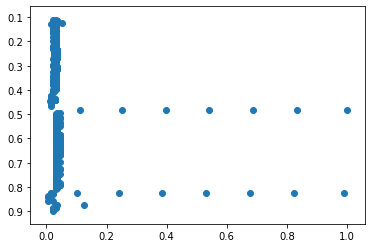

In [44]:
draw_scaled_page(tag_positions)

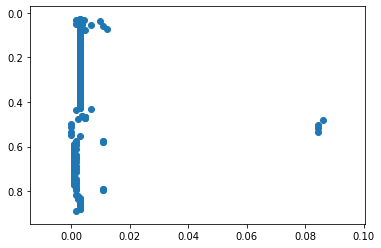

In [20]:
draw_scaled_page(tag_positions)

In [28]:
i = 0
while i < len(x_seq):
    tagParser.feed(x_seq[i])
    tag_info = tagParser.pop_first_and_reset()
    parsed_node = just_a_button[i]
    if not compare_tag(tag_info, parsed_node):
        print(i, tag_info, parsed_node)
    i+=1
print(f"len x_seq: {len(x_seq)}, i: {i}")

len x_seq: 678, i: 678


In [29]:
tagParser.feed(x_seq[0])
tag_info = tagParser.pop_first_and_reset()
print(tag_info)

('a', [('href', '/')])


In [30]:
test_jb = just_a_button[0]
print(test_jb)

('a', (304, 16), [('href', '/')])


In [31]:
compare_tag(tag_info, test_jb)

True

In [10]:
def compare_tag(tag_info, parsed_node):
    if tag_info[0] == parsed_node[0]:
        if len(tag_info[1]) == len(parsed_node[2]):
            if len(tag_info[1]) == 0:
                return True
            for attr_a, attr_b in zip(tag_info[1], parsed_node[2]):
                if attr_a[0] == attr_b[0]:
                    if attr_a[0] == 'href':
#                         if attr_a[1] == attr_b[1].replace(" ","%20") or attr_a[1] == attr_b[1].replace(" ",""):
                        if unquote(attr_a[1]) == unquote(attr_b[1]):
                            return True
                    else:
                        return True
    else:
        return False

In [11]:
def position_check(file, parser, tagParser):
    selector = Selector(text=file)
    x_seq = selector.xpath(".//a|.//button").extract()
    parser._reset()
    parser.feed(file)
    just_a_button = [data for data in parser.start_tags if data[0] == 'a' or data[0] == 'button']
    if len(x_seq) == len(just_a_button):
        return True
    if len(x_seq) > len(just_a_button):
        print(f"Size of x_seq({len(x_seq)}) smaller than just_a_button({len(just_a_button)})!")
        return False
    i = 0
    i = 0
    while i < len(x_seq):
        tagParser.feed(x_seq[i])
        tag_info = tagParser.pop_first_and_reset()
        parsed_node = just_a_button[i]
        if not compare_tag(tag_info, parsed_node):
            return False
        i+=1
    return True

## Test Some Selector

In [25]:
root = Selector(file)
# selector = selector.xpath(".//button")
# print(selector.extract())
extracted_data = selector.css(".thisclass+ li a").extract()
print(extracted_data)

NameError: name 'selector' is not defined

In [139]:
for el in selector.xpath(".//*[not(child::*)]"):
    links_parent = el.xpath('ancestor::a|ancestor::button')
    if links_parent:
        continue
        for link in links_parent:
            print(link.extract())
    else:
        for link in el.css('a'):
            print(link.extract())
        for link in el.css('button'):
            print(link.extract())

<a class="ct-overlay-a" target="_blank" href="https://cuttime.net/?utm_source=jwpepperbanner&amp;utm_medium=internal&amp;utm_campaign=your-complete-solution"></a>
<button class="close-ct">✕</button>
<a href="/sheet-music/services-cares.jsp">Need Help? 1-800-345-6296</a>
<a href="/sheet-music/events">Events</a>
<a href="/sheet-music/regional/local-connections.jsp">Local Connections</a>
<a href="/sheet-music/accounts/cart-history.jsp?link=header" class="loginRequired mainmenuitem">My Account</a>
<a href="/sheet-music/accounts/cart-history.jsp?link=menu" class="loginRequired subcategoryofmain">Orders and Tracking</a>
<a href="/sheet-music/carts/saved-carts.jsp" class="loginRequired subcategoryofmain">Saved Web Carts</a>
<a href="/sheet-music/accounts/payment.jsp?link=header&amp;currentAccount=" class="myaccount-login subcategoryofmain">Make a Payment</a>
<a href="/sheet-music/services-bookkeeper.jsp" class="myaccount-links mainmenuitem">Bookkeeper Account</a>
<a href="https://jwpepper1876

## Function to loop file for testing

In [24]:
def check_file_wellDownloaded(data, parser):
    for idx,row in data.iterrows():
        index = row['File Name']
        page_selector = row['PREV']
        encoding = row['Encoding']
        f = open(html_dir+index+".html", "r", encoding=encoding)
        file = f.read()
        parser.feed(file)
        print(f"Index: {index}, Tag size: {len(parser.start_tags)}, Well Download: {parser.wellDownloaded}")
        parser._reset()

In [25]:
check_file_wellDownloaded(data, parser)

Index: 1, Tag size: 189, Well Download: True
Index: 2, Tag size: 188, Well Download: True
Index: 3, Tag size: 301, Well Download: True
Index: 4, Tag size: 308, Well Download: True
Index: 5, Tag size: 562, Well Download: True
Index: 6, Tag size: 567, Well Download: True
Index: 7, Tag size: 620, Well Download: True
Index: 8, Tag size: 696, Well Download: True
Index: 9, Tag size: 520, Well Download: True
Index: 10, Tag size: 2692, Well Download: True
Index: 11, Tag size: 1750, Well Download: True
Index: 12, Tag size: 1839, Well Download: True
Index: 13, Tag size: 258, Well Download: True
Index: 14, Tag size: 287, Well Download: True
Index: 15, Tag size: 518, Well Download: True
Index: 16, Tag size: 512, Well Download: True
Index: 17, Tag size: 672, Well Download: True
Index: 18, Tag size: 459, Well Download: True
Index: 19, Tag size: 707, Well Download: True
Index: 20, Tag size: 437, Well Download: True
Index: 21, Tag size: 447, Well Download: True
Index: 22, Tag size: 614, Well Download:

In [79]:
def check_for_position_mapping(data, parser, tagParser):
    print("Error List: ")
    for idx,row in data.iterrows():
        index = row['File Name']
        encoding = row['Encoding']
        f = open(html_dir+index+".html", "r", encoding=encoding)
        file = f.read()
        if position_check(file, parser, tagParser) != True:
            print(f"Index: {index}, Encoding: {encoding}")
    return

In [80]:
check_for_position_mapping(data, parser, tagParser)

Error List: 


In [26]:
def extract_data(index, selector_list, encoding):
    has_wa = False
    f = open(html_dir+index+".html", "r", encoding=encoding)
    file = f.read()
    selector = Selector(text=file)
    data_list = []
    for css_selector in selector_list:
        extracted_data = selector.css(css_selector).extract()
        if len(extracted_data) == 0:
            has_wa = True
        data_list.append(extracted_data)
    if has_wa:
        return []
    else:
        return data_list

In [27]:
# Prev
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['PREV']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except Exception as e:
        Failed.append(index)
        print(e)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [28]:
# Page
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['PAGE']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [29]:
# Next
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['NEXT']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [30]:
# Last
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['LAST']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [31]:
# First
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['FIRST']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []
